SIN-392 - Introduction to Digital Image Processing (2023-1)

# Lecture 04 - Intensity transformations (Part 2)

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importing the libraries

In [1]:
import numpy as np

from skimage import util, color

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### %matplotlib notebook
SMALL_SIZE = 7
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

## Loading an image

In [2]:
img_gray = plt.imread('./images/boat.tif')

print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


* Listing the possible intensities values.

In [3]:
# 8-bit unsigned integer
r = np.array(np.linspace(0, 255, 256))

# Float: 256 values between 0 and 1. For viewing purposes only.
r_ = np.array(np.linspace(0, 1, 256))
### print(r_)

## Generating images with different characteristics

* Bright image
* Dark image
* Low contrast image
* High contrast image (original image)

### Bright image

In [4]:
# Set the gamma value
gama_02 = 0.2

# Gamma transformation
img_gray_bright = util.img_as_ubyte(util.img_as_float(img_gray) ** gama_02)

s_clara = r_ ** gama_02 * 255

### Dark image

In [5]:
# Set the gamma value
gama_40 = 4.0

# Gamma transformation
img_gray_dark = util.img_as_ubyte(util.img_as_float(img_gray) ** gama_40)

s_escura = r_ ** gama_40 * 255

### Low contrast image

In [6]:
# Linear function - decreases contrast

# Linear transformation
img_gray_low = img_gray * 0.25 + 95

s_baixo = r * 0.25 + 95

### Ploting the functions

In [7]:
s_list = [r, s_clara, s_escura, s_baixo]

title_list = ['High contrast (original)', 'Bright', 'Dark', 'Low contrast']

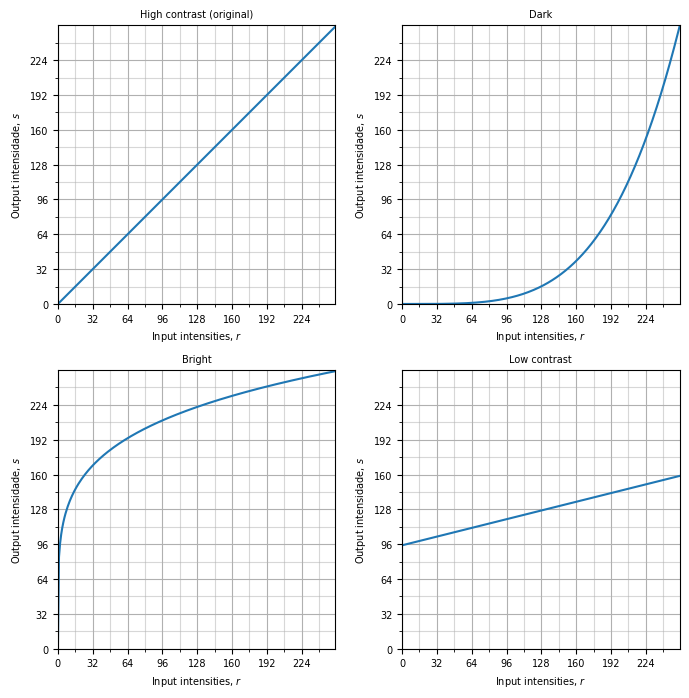

In [8]:
fig, ax  = plt.subplots(2, 2, figsize=(7, 7))
for i, s in enumerate(s_list):
    ch_ = ax[i%2, i//2].plot(r, s)

    ax[i%2, i//2].autoscale(enable=True, axis='both', tight=True)
    ### ax[i] = fig.gca()
    ax[i%2, i//2].set_xticks(np.arange(0, 256, 32), minor=False)
    ax[i%2, i//2].set_xticks(np.arange(0, 256, 16), minor=True)
    ax[i%2, i//2].set_yticks(np.arange(0, 256, 32), minor=False)
    ax[i%2, i//2].set_yticks(np.arange(0, 256, 16), minor=True)
    ax[i%2, i//2].set_aspect('equal')
    ax[i%2, i//2].grid(which='major', alpha=1.0)
    ax[i%2, i//2].grid(which='minor', alpha=0.5)
    ax[i%2, i//2].set_ylim(0, 256)
    ax[i%2, i//2].set_xlabel('Input intensities, $r$', fontsize='medium')
    ax[i%2, i//2].set_ylabel('Output intensidade, $s$', fontsize='medium')
    ax[i%2, i//2].set_title(title_list[i])
    
plt.tight_layout()
plt.show()

### Plotting the images

In [9]:
# Python list containing images with different intensity distributions.
img_list = [img_gray, img_gray_bright, img_gray_dark, img_gray_low]

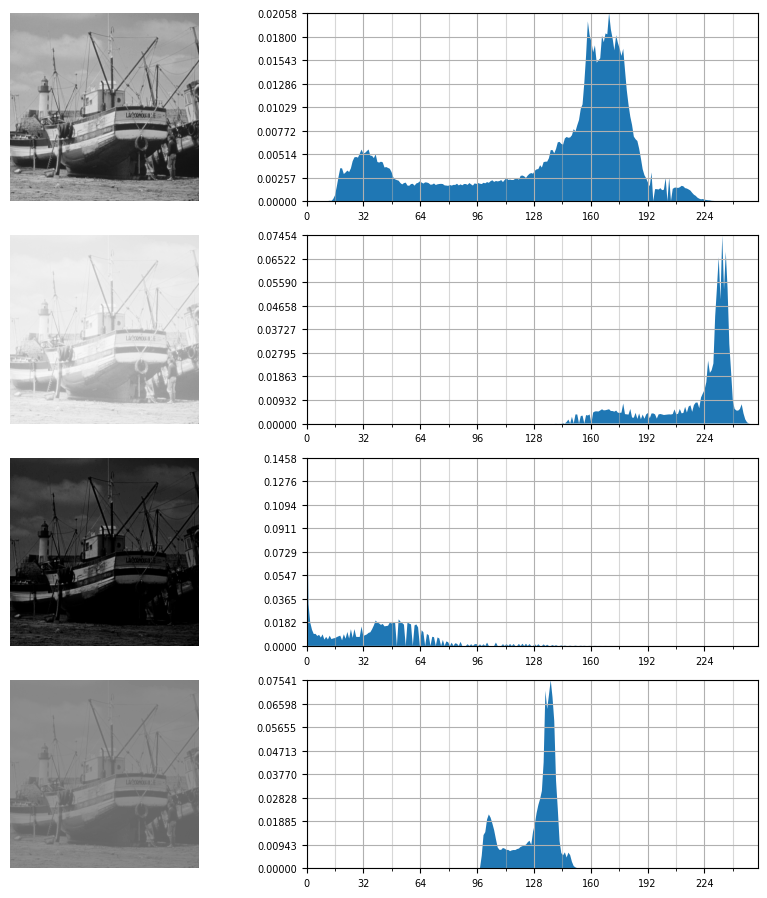

In [10]:
# Figure with 4 rows and 2 columns
fig, ax = plt.subplots(4, 2, figsize=(9, 9))
for i, img in enumerate(img_list):
    # Plot image
    img_ = ax[i, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
    ax[i, 0].axis('off')
    
    # Compute the normalized histogram
    hist, bins = np.histogram(img, bins=256, range=(0, 255))
    hist_norm = hist / (img.shape[0] * img.shape[1])
    
    # Plot the histogram
    ch_ = ax[i, 1].fill_between(bins[:-1], hist_norm)
    #
    ax[i, 1].autoscale(enable=True, axis='both', tight=True)
    ax[i, 1].set_xticks(np.arange(0, 256, 32), minor=False)
    ax[i, 1].set_xticks(np.arange(0, 256, 16), minor=True)
    ax[i, 1].set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
    ax[i, 1].set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
    #ax[i, 1].set_aspect('equal')
    ax[i, 1].grid(which='major', alpha=1.0)
    ax[i, 1].grid(which='minor', alpha=0.5)
    ax[i, 1].set_ylim(0, hist_norm.max())
    
plt.tight_layout()
plt.show()

### Information about the images

In [11]:
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())
print(img_gray_bright.shape, img_gray_bright.dtype, img_gray_bright.min(), img_gray_bright.max())
print(img_gray_dark.shape, img_gray_dark.dtype, img_gray_dark.min(), img_gray_dark.max())
print(img_gray_low.shape, img_gray_low.dtype, img_gray_low.min(), img_gray_low.max())

(512, 512) uint8 0 239
(512, 512) uint8 0 252
(512, 512) uint8 0 197
(512, 512) float64 95.0 154.75


## Piecewise linear functions
-----

### Loading an image

In [12]:
img_gray = plt.imread('./images/boat.tif')

# Plot information about the images
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(512, 512) uint8 0 239


### Setting control points

In [13]:
## pts_r = [0, 50, 100, 150, 180,  200, 255] # Obrigatório ter o 0 e o 256.
## pts_s = [10, 20, 40, 50, 70, 90, 100]

pts_r = [0, 32, 64, 128, 256] # Mandatory to have 0 (start) and 256 (at the end).
pts_s = [0, 16, 80, 142, 200]

pts_r = [0, 32, 64, 160, 256] # Mandatory to have 0 (start) and 256 (at the end).
pts_s = [0, 16, 96, 112, 200]

### Plotting the piecewise linear function

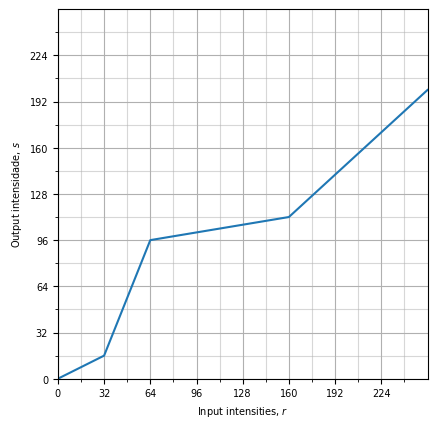

In [14]:
fig = plt.figure()
plt.plot(pts_r, pts_s)
    
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 256, 32))
ax.set_xticks(np.arange(0, 256, 16), minor=True)
ax.set_yticks(np.arange(0, 256, 32), minor=False)
ax.set_yticks(np.arange(0, 256, 16), minor=True)
ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, 256)
ax.set_xlabel('Input intensities, $r$', fontsize='medium')
ax.set_ylabel('Output intensidade, $s$', fontsize='medium')

plt.show()

### Applying the transformation function

In [15]:
# Note: Only for motorically increasing linear functions.

img_out = np.zeros(img_gray.shape, dtype=img_gray.dtype)
for i, (pt_r, pt_s) in enumerate(zip(pts_r[:-1], pts_s[:-1])):
    # Only pixels with a value between pts_r[i] and pts_r[i+1]
    # (max(s) - min(s)) * ...
    # ((r - min(r)) / ...
    # (max(r) - min(r)) + min(s)
    img_out[np.where(np.logical_and(img_gray >= pts_r[i], img_gray < pts_r[i+1]))] = \
            (pts_s[i+1] - pts_s[i]) * \
            ((img_gray[np.where(np.logical_and(img_gray >= pts_r[i], img_gray < pts_r[i+1]))] - pts_r[i]) / \
            (pts_r[i+1] - pts_r[i]) ) + pts_s[i]

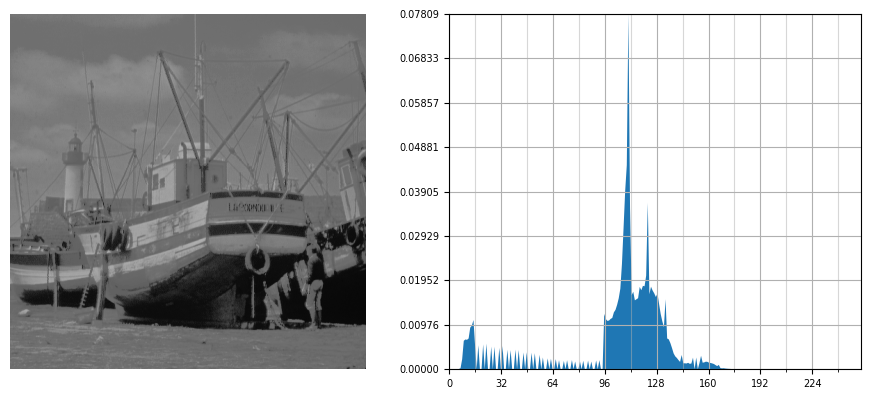

In [16]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(9, 4))
# Plots the original image
img_ = ax1.imshow(img_out, cmap='gray', vmin=0, vmax=255)
ax1.axis('off')

# Compute the normalized histogram
hist, bins = np.histogram(img_out, bins=256, range=(0, 255))
hist_norm = hist / (img_out.shape[0] * img_out.shape[1])

# Plot the histogram
ch_ = ax2.fill_between(bins[:-1], hist_norm)
ax2.autoscale(enable=True, axis='both', tight=True)
ax2.set_xticks(np.arange(0, 256, 32), minor=False)
ax2.set_xticks(np.arange(0, 256, 16), minor=True)
ax2.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax2.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
#ax[i, 1].set_aspect('equal')
ax2.grid(which='major', alpha=1.0)
ax2.grid(which='minor', alpha=0.5)
ax2.set_ylim(0, hist_norm.max())

plt.tight_layout()
plt.show()

## Contrast Stretching
----

### Minimum and maximum values in the image

In [17]:
# ==================================================
# ***** Choose the input image *****
# ==================================================
# ['orig', 'bright', 'dark', 'low']
input_image = 'bright' 

In [18]:
if input_image == 'orig':
    img_gray_ = img_gray

elif input_image == 'bright':
    img_gray_ = img_gray_bright

elif input_image == 'dark':
    img_gray_ = img_gray_dark

elif input_image == 'low':
    img_gray_ = img_gray_low

pts_r = [0, img_gray_.min(), img_gray_.max(), 256] # It is mandatory to have the 0 and the 256.
pts_s = [0, 0, 256, 256]

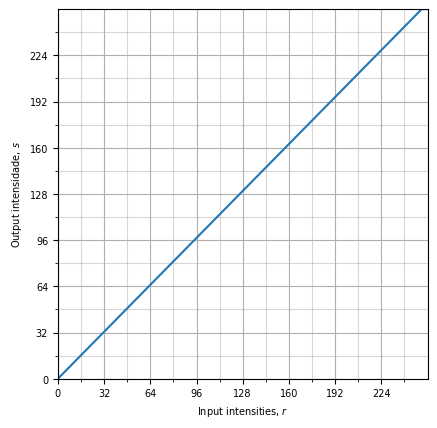

In [19]:
fig = plt.figure()
plt.plot(pts_r, pts_s)
    
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 256, 32))
ax.set_xticks(np.arange(0, 256, 16), minor=True)
ax.set_yticks(np.arange(0, 256, 32), minor=False)
ax.set_yticks(np.arange(0, 256, 16), minor=True)
ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, 256)
ax.set_xlabel('Input intensities, $r$', fontsize='medium')
ax.set_ylabel('Output intensidade, $s$', fontsize='medium')

plt.show()

In [20]:
# Note: Only for motorically increasing linear functions.

img_out = np.zeros(img_gray_.shape, dtype=img_gray_.dtype)
for i, (pt_r, pt_s) in enumerate(zip(pts_r[:-1], pts_s[:-1])):
    # Only pixels with a value between pts_r[i] and pts_r[i+1]
    # (max(s) - min(s)) * ...
    # ((r - min(r)) / ...
    # (max(r) - min(r)) + min(s)
    img_out[np.where(np.logical_and(img_gray_ >= pts_r[i], img_gray_ < pts_r[i+1]))] = \
            (pts_s[i+1] - pts_s[i]) * \
            ((img_gray_[np.where(np.logical_and(img_gray_ >= pts_r[i], img_gray_ < pts_r[i+1]))] - pts_r[i]) / \
            (pts_r[i+1] - pts_r[i]) ) + pts_s[i]

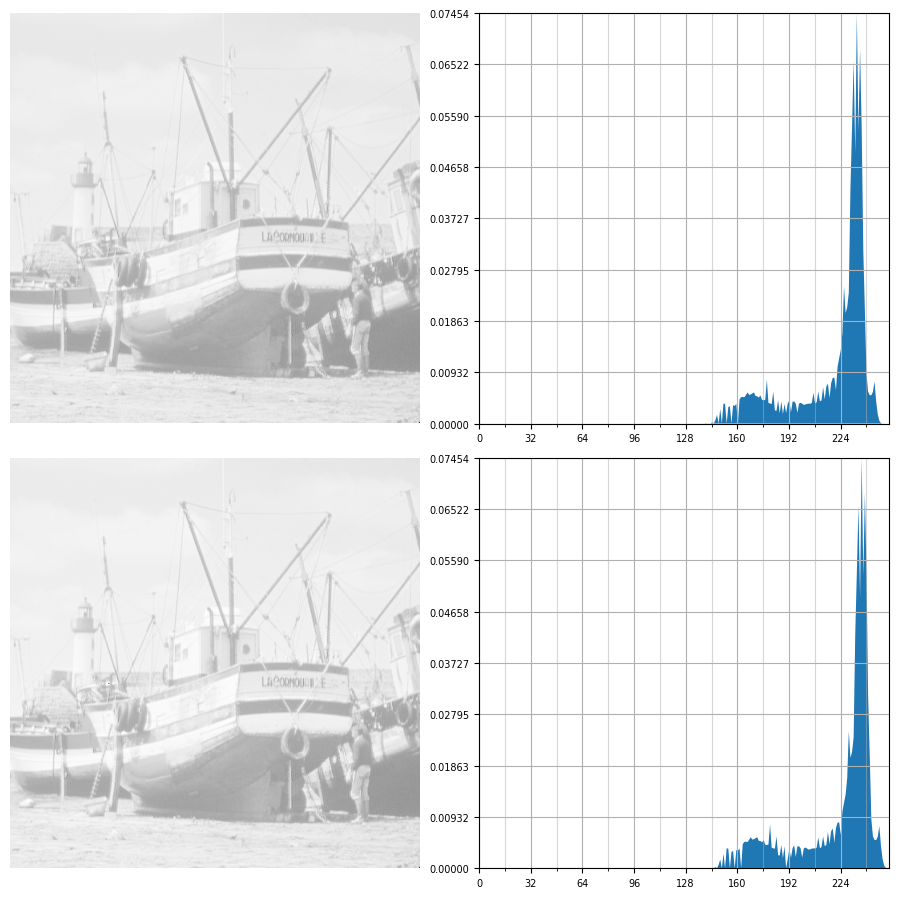

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 9))
# Plots the original image
img_ = ax1.imshow(img_gray_, cmap='gray', vmin=0, vmax=255)
ax1.axis('off')

# Compute the normalized histogram
hist, bins = np.histogram(img_gray_, bins=256, range=(0, 255))
hist_norm = hist / (img_gray_.shape[0] * img_gray_.shape[1])

# Plot the histogram
ch_ = ax2.fill_between(bins[:-1], hist_norm)
ax2.autoscale(enable=True, axis='both', tight=True)
ax2.set_xticks(np.arange(0, 256, 32), minor=False)
ax2.set_xticks(np.arange(0, 256, 16), minor=True)
ax2.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax2.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
#ax[i, 1].set_aspect('equal')
ax2.grid(which='major', alpha=1.0)
ax2.grid(which='minor', alpha=0.5)
ax2.set_ylim(0, hist_norm.max())

# Plot image after transformation
img_ = ax3.imshow(img_out, cmap='gray', vmin=0, vmax=255)
ax3.axis('off')

# Compute the normalized histogram
hist, bins = np.histogram(img_out, bins=256, range=(0, 255))
hist_norm = hist / (img_gray_.shape[0] * img_gray_.shape[1])

# Plot the histogram
ch_ = ax4.fill_between(bins[:-1], hist_norm)
ax4.autoscale(enable=True, axis='both', tight=True)
ax4.set_xticks(np.arange(0, 256, 32), minor=False)
ax4.set_xticks(np.arange(0, 256, 16), minor=True)
ax4.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax4.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
#ax4[i, 1].set_aspect('equal')
ax4.grid(which='major', alpha=1.0)
ax4.grid(which='minor', alpha=0.5)
ax4.set_ylim(0, hist_norm.max())

plt.tight_layout()
plt.show()

### Specifying minimum and maximum values

In [22]:
# ==================================================
# ***** Choose the input image *****
# ==================================================
# ['orig', 'bright', 'dark', 'low']
input_image = 'bright' 

In [23]:
if input_image == 'orig':
    # pts_r = [0, min, max, 256]
    img_gray_ = img_gray
    pts_r = [0, 0, 256, 256] # It is mandatory to have the 0 and the 256.

elif input_image == 'bright':
    img_gray_ = img_gray_bright
    pts_r = [0, (255 * 0.5), img_gray_.max(), 256] # It is mandatory to have the 0 and the 256.

elif input_image == 'dark':
    img_gray_ = img_gray_dark
    pts_r = [0, img_gray_.min(), (255 * 0.5), 256] # It is mandatory to have the 0 and the 256.

elif input_image == 'low':
    img_gray_ = img_gray_low
    pts_r = [0, (255 * 0.33), (255 * 0.66), 256] # It is mandatory to have the 0 and the 256.

pts_s = [0, 0, 256, 256]

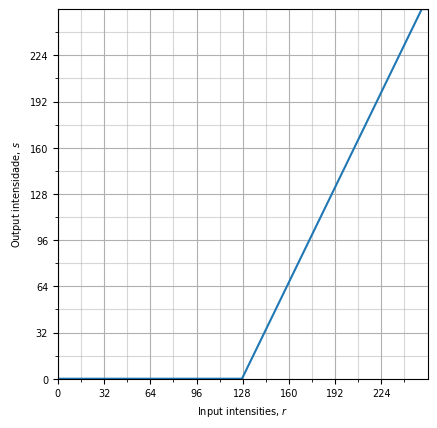

In [24]:
fig = plt.figure()
plt.plot(pts_r, pts_s)
    
plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 256, 32))
ax.set_xticks(np.arange(0, 256, 16), minor=True)
ax.set_yticks(np.arange(0, 256, 32), minor=False)
ax.set_yticks(np.arange(0, 256, 16), minor=True)
ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(0, 256)
ax.set_xlabel('Input intensities, $r$', fontsize='medium')
ax.set_ylabel('Output intensidade, $s$', fontsize='medium')

plt.show()

### Applying the transformation function

In [25]:
# Note: Only for motorically increasing linear functions.

img_out = np.zeros(img_gray_.shape, dtype=img_gray_.dtype)
for i, (pt_r, pt_s) in enumerate(zip(pts_r[:-1], pts_s[:-1])):
    # Only pixels with a value between pts_r[i] and pts_r[i+1]
    # (max(s) - min(s)) * ...
    # ((r - min(r)) / ...
    # (max(r) - min(r)) + min(s)
    img_out[np.where(np.logical_and(img_gray_ >= pts_r[i], img_gray_ < pts_r[i+1]))] = \
            (pts_s[i+1] - pts_s[i]) * \
            ((img_gray_[np.where(np.logical_and(img_gray_ >= pts_r[i], img_gray_ < pts_r[i+1]))] - pts_r[i]) / \
            (pts_r[i+1] - pts_r[i]) ) + pts_s[i]

### Plotting the images 

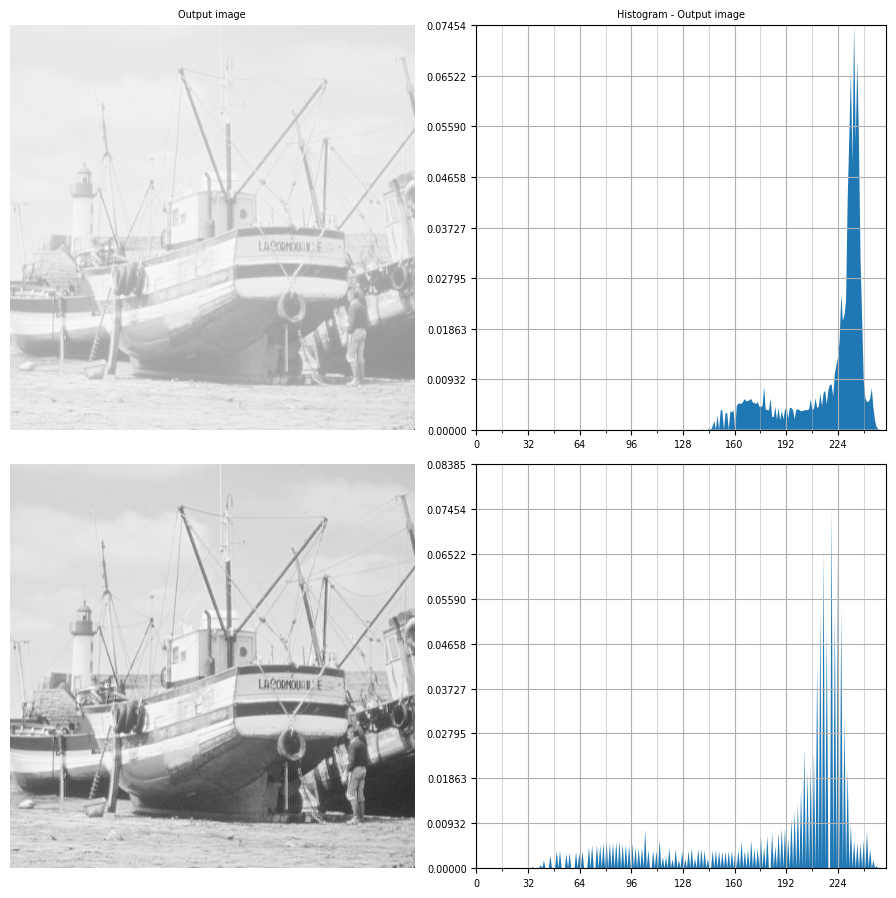

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9, 9))
# Plot the original image
img_ = ax1.imshow(img_gray_, cmap='gray', vmin=0, vmax=255)
ax1.axis('off')
ax1.set_title('Input image')

# Compute the normalized histogram
hist, bins = np.histogram(img_gray_, bins=256, range=(0, 255))
hist_norm = hist / (img_gray_.shape[0] * img_gray_.shape[1])

# Plot the histogram
ch_ = ax2.fill_between(bins[:-1], hist_norm)
ax2.autoscale(enable=True, axis='both', tight=True)
ax2.set_xticks(np.arange(0, 256, 32), minor=False)
ax2.set_xticks(np.arange(0, 256, 16), minor=True)
ax2.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax2.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
#ax[i, 1].set_aspect('equal')
ax2.grid(which='major', alpha=1.0)
ax2.grid(which='minor', alpha=0.5)
ax2.set_ylim(0, hist_norm.max())
ax2.set_title('Histograma - Imagem original')

# Plot image after transformation
img_ = ax3.imshow(img_out, cmap='gray', vmin=0, vmax=255)
ax3.axis('off')
ax1.set_title('Output image')

# Compute the normalized histogram
hist, bins = np.histogram(img_out, bins=256, range=(0, 255))
hist_norm = hist / (img_gray_.shape[0] * img_gray_.shape[1])

# Plot the histogram
ch_ = ax4.fill_between(bins[:-1], hist_norm)
ax4.autoscale(enable=True, axis='both', tight=True)
ax4.set_xticks(np.arange(0, 256, 32), minor=False)
ax4.set_xticks(np.arange(0, 256, 16), minor=True)
ax4.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/8), minor=False)
ax4.set_yticks(np.arange(0, hist_norm.max()+0.01, hist_norm.max()/4), minor=True)
#ax4[i, 1].set_aspect('equal')
ax4.grid(which='major', alpha=1.0)
ax4.grid(which='minor', alpha=0.5)
ax2.set_ylim(0, hist_norm.max())
ax2.set_title('Histogram - Output image')

plt.tight_layout()
plt.show()

## Bibliography
---

* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * In Brazilian Portuguese.
    * Available for download on the author's website (Personal use only).
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  
* GONZALEZ, R.C.; WOODS, R.E.; Digital Image Processing. 3rd edition. Pearson, 2009.
* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * In Brazilian Portuguese.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  
* Universidade de Waterloo. Image Repository.
    * http://links.uwaterloo.ca/Repository.html
* The USC-SIPI Image Database    
    * http://sipi.usc.edu/database/database.php
* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * http://scipy-lectures.org/
* scikit-image. Documentation.
    * https://scikit-image.org/docs/dev/index.html
* NumPy. Documentation.
    * https://numpy.org/doc/stable/